# CH-04 ËÆì AI Ë®àÁÆóÊäÄË°ìÊåáÊ®ôÂèäË≥áÊñôË¶ñË¶∫Âåñ

## 4-1 ÊäÄË°ìÊåáÊ®ôÂÖ¨ÂºèÂ§™Ë§áÈõúÔºüËÆì AI Ëá™ÂãïÂåñË®àÁÆó

### 1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [1]:
!pip install openai
!pip install yfinance==0.2.38
from  openai import OpenAI, OpenAIError # ‰∏≤Êé• OpenAI API
import yfinance as yf
import pandas as pd # Ë≥áÊñôËôïÁêÜÂ•ó‰ª∂
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73.0/73.0 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.49
    Uninstalling yfinance-0.2.49:
      Successfully uninstalled yfinance-0.2.49


### 2Ô∏è‚É£ ÂèñÂæóËÇ°Á•®Ë≥áÊñô

In [2]:
# Ëº∏ÂÖ•ËÇ°Á•®‰ª£Ëôü
stock_id = "2330.tw"
# ÊäìÂèñÂçäÂπ¥Ë≥áÊñô
end = dt.date.today() # Ë≥áÊñôÁµêÊùüÊôÇÈñì
start = end - dt.timedelta(days=180) # Ë≥áÊñôÈñãÂßãÊôÇÈñì
df = yf.download(stock_id, start=start, end=end).reset_index()

print(df)

[*********************100%%**********************]  1 of 1 completed

          Date    Open    High     Low   Close    Adj Close    Volume
0   2024-06-07   885.0   888.0   879.0   879.0   871.728271  41075399
1   2024-06-11   892.0   895.0   883.0   883.0   875.695190  48228488
2   2024-06-12   888.0   914.0   888.0   909.0   901.480103  48106925
3   2024-06-13   923.0   935.0   911.0   919.0   914.919983  55857091
4   2024-06-14   916.0   922.0   905.0   922.0   917.906616  38408123
..         ...     ...     ...     ...     ...          ...       ...
115 2024-11-27  1010.0  1020.0  1000.0  1000.0  1000.000000  31276090
116 2024-11-28  1005.0  1005.0   992.0  1005.0  1005.000000  33689956
117 2024-11-29   995.0  1010.0   994.0   996.0   996.000000  40094983
118 2024-12-02  1020.0  1040.0  1015.0  1035.0  1035.000000  31168404
119 2024-12-03  1060.0  1065.0  1055.0  1055.0  1055.000000  43414538

[120 rows x 7 columns]


### 3Ô∏è‚É£ Ëº∏ÂÖ• OpenAI API KEY

In [7]:
from google.colab import userdata

client = OpenAI(
  base_url="https://api.groq.com/openai/v1",
  api_key=userdata.get('GROQ_API_KEY')
)

### 4Ô∏è‚É£ ÂâµÂª∫ GPT 3.5 Ê®°ÂûãÂáΩÂºè

In [8]:
model_name = "llama3-groq-70b-8192-tool-use-preview"

def get_reply(messages):
  try:
    response = client.chat.completions.create(model=model_name,
                         messages=messages)
    reply = response.choices[0].message.content
  except OpenAIError as err:
    reply = f"ÁôºÁîü {err.type} ÈåØË™§\n{err.message}"
  return reply

# Ë®≠ÂÆö AI ËßíËâ≤, ‰ΩøÂÖ∂‰æùÊìö‰ΩøÁî®ËÄÖÈúÄÊ±ÇÈÄ≤Ë°å df ËôïÁêÜ
def ai_helper(df, user_msg):

  msg = [{
    "role":
    "system",
    "content":
    f"As a professional code generation robot, \
      I require your assistance in generating Python code \
      based on specific user requirements. To proceed, \
      I will provide you with a dataframe (df) that follows the \
      format {df.columns}. Your task is to carefully analyze the \
      user's requirements and generate the Python code \
      accordingly.Please note that your response should solely \
      consist of the code itself, \
      and no additional information should be included."
  }, {
    "role":
    "user",
    "content":
    f"The user requirement:{user_msg} \n\
       Your task is to develop a Python function named \
      'calculate(df)'. This function should accept a dataframe as \
      its parameter. Ensure that you only utilize the columns \
      present in the dataset, specifically {df.columns}. \
      After processing, the function should return the processed \
      dataframe. Your response should strictly contain the Python \
      code for the 'calculate(df)' function \
      and exclude any unrelated content."
  }]

  reply_data = get_reply(msg)
  cleaned_code = reply_data.replace("```", "")
  cleaned_code = cleaned_code.replace("python", "")

  return cleaned_code

### ËÆì AI Ëá™ÂãïÁîüÊàêÊäÄË°ìÊåáÊ®ôÁ®ãÂºèÁ¢º

### 5Ô∏è‚É£ Ë®àÁÆóÁßªÂãïÂπ≥ÂùáÁ∑ö

In [9]:
code_str = ai_helper(df, "Ë®àÁÆó8Êó•MAËàá13Êó•MA ")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['8d_MA'] = df['Close'].rolling(window=8).mean()
    df['13d_MA'] = df['Close'].rolling(window=13).mean()
    return df


Date    Open    High     Low   Close  Adj Close    Volume     8d_MA  \
115 2024-11-27  1010.0  1020.0  1000.0  1000.0     1000.0  31276090  1022.500   
116 2024-11-28  1005.0  1005.0   992.0  1005.0     1005.0  33689956  1020.000   
117 2024-11-29   995.0  1010.0   994.0   996.0      996.0  40094983  1014.500   
118 2024-12-02  1020.0  1040.0  1015.0  1035.0     1035.0  31168404  1015.750   
119 2024-12-03  1060.0  1065.0  1055.0  1055.0     1055.0  43414538  1021.375   

          13d_MA  
115  1032.307692  
116  1026.153846  
117  1022.000000  
118  1022.000000  
119  1023.538462

### 6Ô∏è‚É£ Ë®àÁÆó MACD

In [10]:
code_str = ai_helper(df, "ÂÖàË®àÁÆó EMA ÂÜçË®àÁÆó MACD, Ê¨Ñ‰ΩçÂêçÁ®±Áî® MACD_Histogram ÂëΩÂêç")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['Signal']
    return df


Date    Open    High     Low   Close  Adj Close    Volume     8d_MA  \
115 2024-11-27  1010.0  1020.0  1000.0  1000.0     1000.0  31276090  1022.500   
116 2024-11-28  1005.0  1005.0   992.0  1005.0     1005.0  33689956  1020.000   
117 2024-11-29   995.0  1010.0   994.0   996.0      996.0  40094983  1014.500   
118 2024-12-02  1020.0  1040.0  1015.0  1035.0     1035.0  31168404  1015.750   
119 2024-12-03  1060.0  1065.0  1055.0  1055.0     1055.0  43414538  1021.375   

          13d_MA       EMA_12       EMA_26      MACD    Signal  MACD_Histogram  
115  1032.307692  1027.184602  1031.675519 -4.490917  1.997230       -6.488147  
116  1026.153846  1023.771586  1029.699555 -5.927968  0.412190       -6.340159  
117  1022.000000  1019.499035  1027.203291 -7.704257 -1.211099       -6.493158  
118  1022.000000  1021.883799  1027.780825 -5.897027 -2.148285       -3.748742  
119  1023.538462  1026.978599  1029.797061 -2.818462 -2.282320       -0.536142

### 7Ô∏è‚É£ Ë®àÁÆó RSI

In [12]:
code_str = ai_helper(df, "Ë®àÁÆó RSI ")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['RSI'] = 100 - (100 / (1 + df['avg_up'] / df['avg_down']))
    return df


Date    Open    High     Low   Close  Adj Close    Volume     8d_MA  \
115 2024-11-27  1010.0  1020.0  1000.0  1000.0     1000.0  31276090  1022.500   
116 2024-11-28  1005.0  1005.0   992.0  1005.0     1005.0  33689956  1020.000   
117 2024-11-29   995.0  1010.0   994.0   996.0      996.0  40094983  1014.500   
118 2024-12-02  1020.0  1040.0  1015.0  1035.0     1035.0  31168404  1015.750   
119 2024-12-03  1060.0  1065.0  1055.0  1055.0     1055.0  43414538  1021.375   

          13d_MA       EMA_12       EMA_26      MACD    Signal  \
115  1032.307692  1027.184602  1031.675519 -4.490917  1.997230   
116  1026.153846  1023.771586  1029.699555 -5.927968  0.412190   
117  1022.000000  1019.499035  1027.203291 -7.704257 -1.211099   
118  1022.000000  1021.883799  1027.780825 -5.897027 -2.148285   
119  1023.538462  1026.978599  1029.797061 -2.818462 -2.282320   

     MACD_Histogram  diff    up  down     avg_up  avg_down        RSI  
115       -6.488147 -10.0   0.0  10.0   4.863061  9.339023  34.241883  
116       -6.340159   5.0   5.0   0.0   4.881319  8.093820  37.620555  
117       -6.493158  -9.0   0.0   9.0   4.230477  8.214644  33.993056  
118       -3.748742  39.0  39.0   0.0   8.866413  7.119358  55.464407  
119       -0.536142  20.0  20.0   0.0  10.350892  6.170110  62.652929

### 8Ô∏è‚É£ Ë®àÁÆóÂ∏ÉÊûóÈÄöÈÅì

In [13]:
code_str = ai_helper(df, "Ë´ãË®àÁÆó1.5ÂÄãÊ®ôÊ∫ñÂ∑ÆÁöÑÂ∏ÉÊûóÈÄöÈÅì, Ê¨Ñ‰Ωç‰ª• Upper_Band Âíå Lower_Band ÂëΩÂêç")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['Upper_Band'] = df['EMA_26'] + 1.5 * df['EMA_26'].rolling(window=26).std()
    df['Lower_Band'] = df['EMA_26'] - 1.5 * df['EMA_26'].rolling(window=26).std()
    return df


Date    Open    High     Low   Close  Adj Close    Volume     8d_MA  \
115 2024-11-27  1010.0  1020.0  1000.0  1000.0     1000.0  31276090  1022.500   
116 2024-11-28  1005.0  1005.0   992.0  1005.0     1005.0  33689956  1020.000   
117 2024-11-29   995.0  1010.0   994.0   996.0      996.0  40094983  1014.500   
118 2024-12-02  1020.0  1040.0  1015.0  1035.0     1035.0  31168404  1015.750   
119 2024-12-03  1060.0  1065.0  1055.0  1055.0     1055.0  43414538  1021.375   

          13d_MA       EMA_12  ...    Signal  MACD_Histogram  diff    up  \
115  1032.307692  1027.184602  ...  1.997230       -6.488147 -10.0   0.0   
116  1026.153846  1023.771586  ...  0.412190       -6.340159   5.0   5.0   
117  1022.000000  1019.499035  ... -1.211099       -6.493158  -9.0   0.0   
118  1022.000000  1021.883799  ... -2.148285       -3.748742  39.0  39.0   
119  1023.538462  1026.978599  ... -2.282320       -0.536142  20.0  20.0   

     down     avg_up  avg_down        RSI   Upper_Band   Lower_Band  
115  10.0   4.863061  9.339023  34.241883  1043.992804  1019.358234  
116   0.0   4.881319  8.093820  37.620555  1040.599835  1018.799275  
117   9.0   4.230477  8.214644  33.993056  1037.089336  1017.317247  
118   0.0   8.866413  7.119358  55.464407  1036.951829  1018.609822  
119   0.0  10.350892  6.170110  62.652929  1038.492590  1021.101531  

[5 rows x 22 columns]

### 9Ô∏è‚É£ ËÉΩÈáèÊΩÆÊåáÊ®ô (On-Balance Volumem, OBV)

In [15]:
import numpy as np
code_str = ai_helper(df, "Ë®àÁÆó OBV ÊåáÊ®ô")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['OBV'] = np.where(df['Close'] > df['Close'].shift(1), df['Volume'], np.where(df['Close'] < df['Close'].shift(1), -df['Volume'], 0))
    df['OBV_SMA'] = df['OBV'].rolling(window=20).mean()
    df['OBV_EMA'] = df['OBV'].ewm(span=20, adjust=False).mean()
    return df


Date    Open    High     Low   Close  Adj Close    Volume     8d_MA  \
115 2024-11-27  1010.0  1020.0  1000.0  1000.0     1000.0  31276090  1022.500   
116 2024-11-28  1005.0  1005.0   992.0  1005.0     1005.0  33689956  1020.000   
117 2024-11-29   995.0  1010.0   994.0   996.0      996.0  40094983  1014.500   
118 2024-12-02  1020.0  1040.0  1015.0  1035.0     1035.0  31168404  1015.750   
119 2024-12-03  1060.0  1065.0  1055.0  1055.0     1055.0  43414538  1021.375   

          13d_MA       EMA_12  ...    up  down     avg_up  avg_down  \
115  1032.307692  1027.184602  ...   0.0  10.0   4.863061  9.339023   
116  1026.153846  1023.771586  ...   5.0   0.0   4.881319  8.093820   
117  1022.000000  1019.499035  ...   0.0   9.0   4.230477  8.214644   
118  1022.000000  1021.883799  ...  39.0   0.0   8.866413  7.119358   
119  1023.538462  1026.978599  ...  20.0   0.0  10.350892  6.170110   

           RSI   Upper_Band   Lower_Band       OBV     OBV_SMA       OBV_EMA  
115  34.241883  1043.992804  1019.358234 -31276090 -7863181.85 -1.198285e+07  
116  37.620555  1040.599835  1018.799275  33689956 -4268584.85 -7.633061e+06  
117  33.993056  1037.089336  1017.317247 -40094983 -3549321.25 -1.072467e+07  
118  55.464407  1036.951829  1018.609822  31168404 -3328299.95 -6.734855e+06  
119  62.652929  1038.492590  1021.101531  43414538 -2776854.15 -1.958723e+06  

[5 rows x 25 columns]

### ËÆì AI Ëá™ÂãïÁµ±Êï¥ Dataframe

### üîü Â∞áÊó•È†ªË≥áÊñôËΩâÊèõÊàêÊúàÈ†ªË≥áÊñô

In [16]:
code_str = ai_helper(df, "Ë´ãÂ∞áÊó•KÁ∑öÁöÑË≥áÊñôËΩâÊèõÊàêÊúàKÁ∑ö ")
print(code_str)
exec(code_str)
new_df = df
df_monthly = new_df
df_monthly = calculate(df_monthly)
df_monthly.tail()

def calculate(df):
    df['Month'] = df['Date'].dt.to_period('M')
    df_grouped = df.groupby('Month').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    }).reset_index()
    df_grouped.columns = ['Month', 'Open', 'High', 'Low', 'Close', 'Volume']
    return df_grouped


Month    Open    High     Low   Close     Volume
2  2024-08   969.0   977.0   813.0   944.0  991085377
3  2024-09   950.0  1025.0   888.0   957.0  676410210
4  2024-10   967.0  1100.0   967.0  1030.0  792908603
5  2024-11   996.0  1090.0   992.0   996.0  762456855
6  2024-12  1020.0  1065.0  1015.0  1055.0   74582942

## 4-2 Ë≥áÊñôË¶ñË¶∫Âåñ

### 1Ô∏è‚É£1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [17]:
import matplotlib.pyplot as plt

### Áï´Âá∫Á∞°ÊòìËÇ°ÂÉπÂúñ

### 1Ô∏è‚É£2Ô∏è‚É£ ËÆìÊàëÂÄëÂÜç‰∏ÄÊ¨°Ê™¢Ë¶ñË≥áÊñôÊ†ºÂºèÂêßÔºÅ

In [18]:
new_df = new_df.reset_index() # ÈáçË®≠ index
new_df['Date'] = pd.to_datetime(new_df['Date']) # Â∞á Date ËΩâÊèõÁÇ∫ datetime È°ûÂà•
new_df.tail()

index       Date    Open    High     Low   Close  Adj Close    Volume  \
115    115 2024-11-27  1010.0  1020.0  1000.0  1000.0     1000.0  31276090   
116    116 2024-11-28  1005.0  1005.0   992.0  1005.0     1005.0  33689956   
117    117 2024-11-29   995.0  1010.0   994.0   996.0      996.0  40094983   
118    118 2024-12-02  1020.0  1040.0  1015.0  1035.0     1035.0  31168404   
119    119 2024-12-03  1060.0  1065.0  1055.0  1055.0     1055.0  43414538   

        8d_MA       13d_MA  ...  down     avg_up  avg_down        RSI  \
115  1022.500  1032.307692  ...  10.0   4.863061  9.339023  34.241883   
116  1020.000  1026.153846  ...   0.0   4.881319  8.093820  37.620555   
117  1014.500  1022.000000  ...   9.0   4.230477  8.214644  33.993056   
118  1015.750  1022.000000  ...   0.0   8.866413  7.119358  55.464407   
119  1021.375  1023.538462  ...   0.0  10.350892  6.170110  62.652929   

      Upper_Band   Lower_Band       OBV     OBV_SMA       OBV_EMA    Month  
115  1043.992804  1019.358234 -31276090 -7863181.85 -1.198285e+07  2024-11  
116  1040.599835  1018.799275  33689956 -4268584.85 -7.633061e+06  2024-11  
117  1037.089336  1017.317247 -40094983 -3549321.25 -1.072467e+07  2024-11  
118  1036.951829  1018.609822  31168404 -3328299.95 -6.734855e+06  2024-12  
119  1038.492590  1021.101531  43414538 -2776854.15 -1.958723e+06  2024-12  

[5 rows x 27 columns]

### 1Ô∏è‚É£3Ô∏è‚É£ ‰ΩøÁî® matplotlib Áï´Âá∫Êî∂Áõ§ÂÉπÁöÑÊäòÁ∑öÂúñ

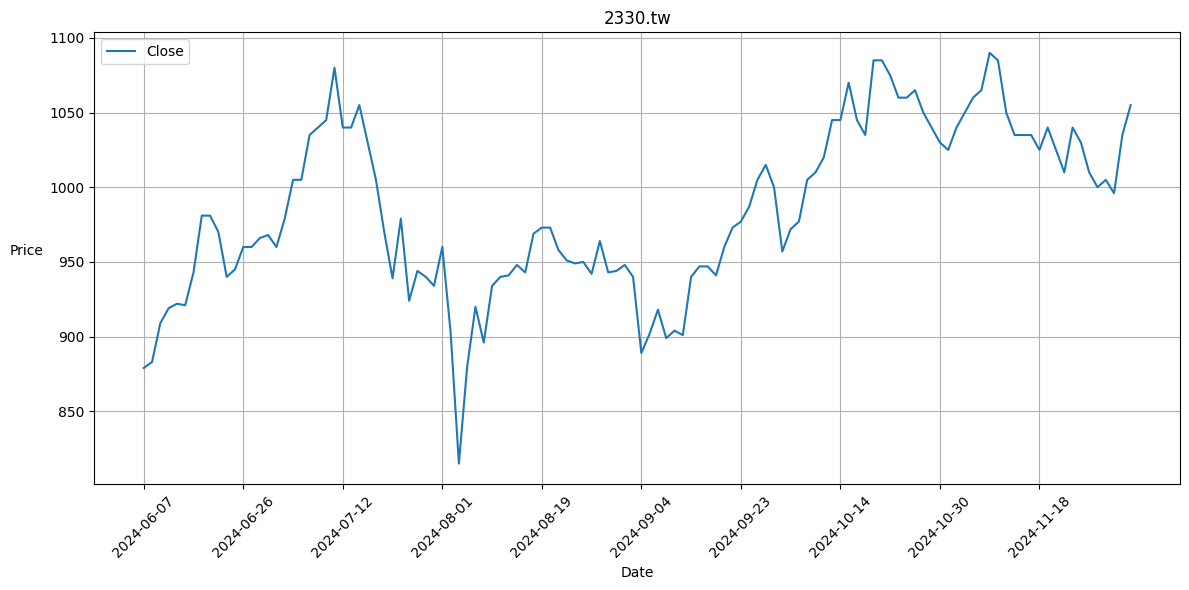

In [19]:
# Áï´Â∏ÉÂ∞∫ÂØ∏Â§ßÂ∞èË®≠ÂÆö
plt.figure(figsize=(12, 6))

# Ë®≠ÂÆöË¶ÅÁπ™Ë£ΩÁöÑË≥áÊñôÊ¨Ñ‰Ωç
plt.plot(new_df['Close'], label='Close')

# Ë®≠ÂÆö x Ëª∏ÁöÑÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num], rotation = 45)

# Ë®≠ÂÆöÂúñË°®ÁöÑÊ®ôÈ°åÔºåx Ëª∏Âíå y Ëª∏ÁöÑÊ®ôÁ±§
plt.title(f'{stock_id}')   # Â∞áËÇ°Á•®‰ª£ËôüË®≠ÁÇ∫ÂúñÊ®ô
plt.xlabel('Date')         # x Ëª∏Ê®ôÁ±§
plt.ylabel('Price', rotation=0, ha='right')  # y Ëª∏Ê®ôÁ±§
plt.legend(loc='upper left') # Âú®Â∑¶‰∏äËßíÈ°ØÁ§∫Âúñ‰æã
plt.grid(True) # Âú®Âúñ‰∏äÈ°ØÁ§∫Á∂≤Ê†º
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()

### 1Ô∏è‚É£4Ô∏è‚É£ Âä†ÂÖ•Êàê‰∫§Èáè

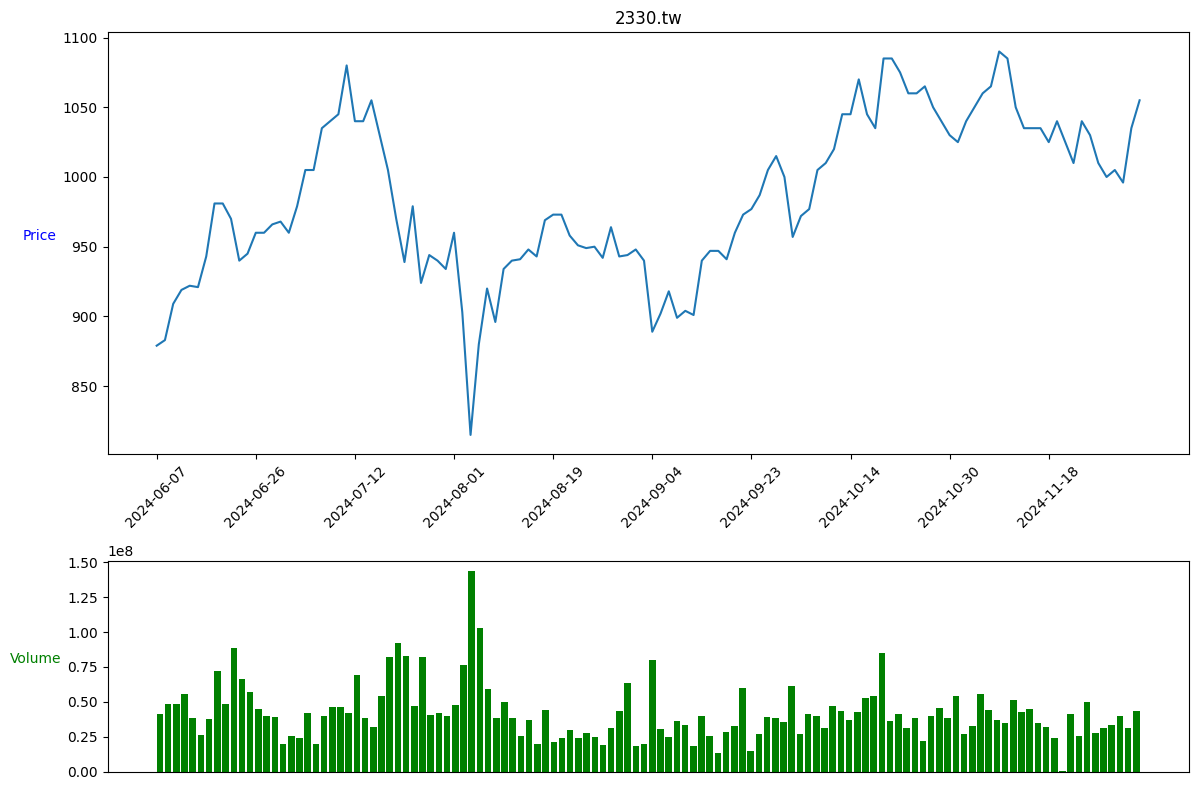

In [20]:
# ÂâµÂª∫ÂÖ©ÂºµÂ≠êÂúñ
fig, (ax1, ax2) = plt.subplots(2, 1,
                figsize=(12, 8),
                gridspec_kw={'height_ratios': [2, 1]})

# Ë®≠ÂÆö x Ëª∏ÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# Áπ™Ë£ΩÊî∂Áõ§ÂÉπ
ax1.plot(new_df['Close'], label='Close')
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num], rotation=45)

# Áπ™Ë£Ω‰∫§ÊòìÈáè
ax2.bar(new_df.index, new_df['Volume'],  color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')
ax2.set_xticks([]) # ‰∏çÈ°ØÁ§∫Êó•ÊúüÊ®ôÁ±§
# Ëã•Ë¶ÅÈ°ØÁ§∫ÂúñË°®Ê®ôÁ±§ÂèØ‰ª•‰ΩøÁî®‰ª•‰∏ãÁ®ãÂºèÁ¢º
# ax2.set_xticks(date[::len(date)//num].index)
# ax2.set_xticklabels(date[::len(date)//num], rotation=45)

# ËÆìÂ≠êÂúñÂ°´ÂÖÖ„ÄÅÂ∞çÈΩä
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()


### 1Ô∏è‚É£5Ô∏è‚É£ Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

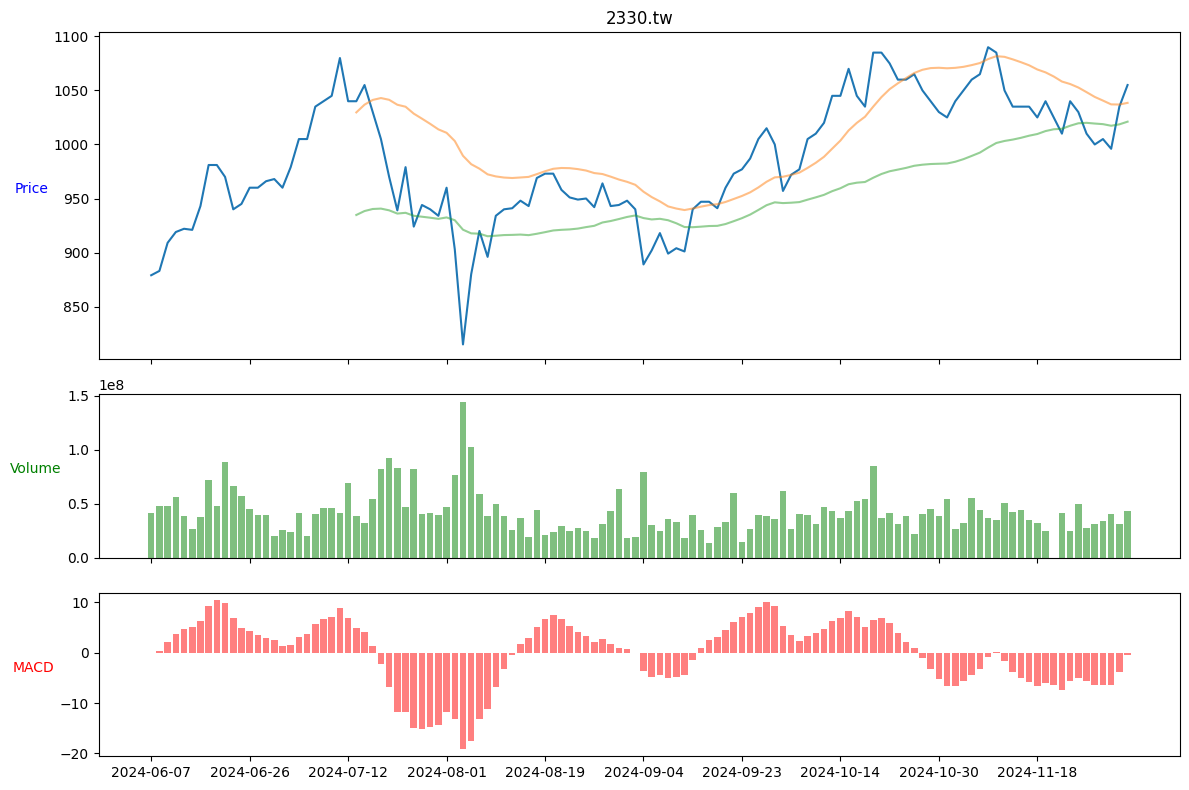

In [21]:
# ÂâµÂª∫‰∏âÂÄãÂ≠êÂúñ
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# Ë®≠ÂÆö x Ëª∏ÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# Áπ™Ë£ΩÊî∂Áõ§ÂÉπ
ax1.plot(new_df['Close'], label='Close')
# Âä†ÂÖ•Â∏ÉÊûóÈÄöÈÅì
ax1.plot(new_df['Upper_Band'], alpha=0.5) # alpha Ë®≠ÂÆöÈÄèÊòéÂ∫¶
ax1.plot(new_df['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num])

# Áπ™Ë£Ω‰∫§ÊòìÈáè
ax2.bar(new_df.index, new_df['Volume'], alpha=0.5, color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')

# Áπ™Ë£ΩÊäÄË°ìÊåáÊ®ô
ax3.bar(new_df.index, new_df['MACD_Histogram'], alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# Ë™øÊï¥Â≠êÂúñÈñìÁöÑË∑ùÈõ¢
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()

### Áπ™Ë£Ω K Á∑öÂúñÔºömplfinance

### 1Ô∏è‚É£6Ô∏è‚É£ ÂåØÂÖ•ÊäÄË°ìÂàÜÊûêÁπ™ÂúñÂ•ó‰ª∂

In [23]:
!pip install mplfinance
import mplfinance as mpf

### 1Ô∏è‚É£7Ô∏è‚É£ ÈÅ∏ÊìáË≥áÊñôÊôÇÈñì

In [24]:
kplot_df = new_df.set_index('Date')
kplot_df = kplot_df['2024-02-01':'2024-07-29']
kplot_df.tail()

index   Open   High    Low  Close   Adj Close    Volume     8d_MA  \
Date                                                                            
2024-07-19     29  988.0  995.0  970.0  970.0  965.693542  92507621  1033.125   
2024-07-22     30  964.0  965.0  938.0  939.0  934.831177  83062356  1019.875   
2024-07-23     31  963.0  979.0  956.0  979.0  974.653564  47213266  1007.250   
2024-07-26     32  915.0  930.0  915.0  924.0  919.897766  82081735   992.750   
2024-07-29     33  942.0  948.0  936.0  944.0  939.808960  40809258   980.750   

                 13d_MA       EMA_12  ...  down     avg_up   avg_down  \
Date                                  ...                               
2024-07-19  1025.307692  1014.058067  ...  35.0   6.884461  13.184877   
2024-07-22  1022.230769  1002.510672  ...  31.0   5.966533  15.560227   
2024-07-23  1020.230769   998.893646  ...   0.0  10.504329  13.485530   
2024-07-26  1014.000000   987.371546  ...  55.0   9.103752  19.020792   
2024-07-29  1007.000000   980.699001  ...   0.0  10.556585  16.484687   

                  RSI   Upper_Band  Lower_Band       OBV     OBV_SMA  \
Date                                                                   
2024-07-19  34.303380  1041.327199  939.055966 -92507621  2231332.30   
2024-07-22  27.716820  1036.745037  936.054189 -83062356  1397814.20   
2024-07-23  43.786539  1034.930919  936.772069  47213266   890055.90   
2024-07-26  32.369419  1028.527408  934.012395 -82081735 -5462389.15   
2024-07-29  39.038788  1023.867073  933.151264  40809258 -3421926.25   

                 OBV_EMA    Month  
Date                               
2024-07-19 -9.471546e+06  2024-07  
2024-07-22 -1.648019e+07  2024-07  
2024-07-23 -1.041415e+07  2024-07  
2024-07-26 -1.723963e+07  2024-07  
2024-07-29 -1.171117e+07  2024-07  

[5 rows x 26 columns]

### 1Ô∏è‚É£8Ô∏è‚É£ Áî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ

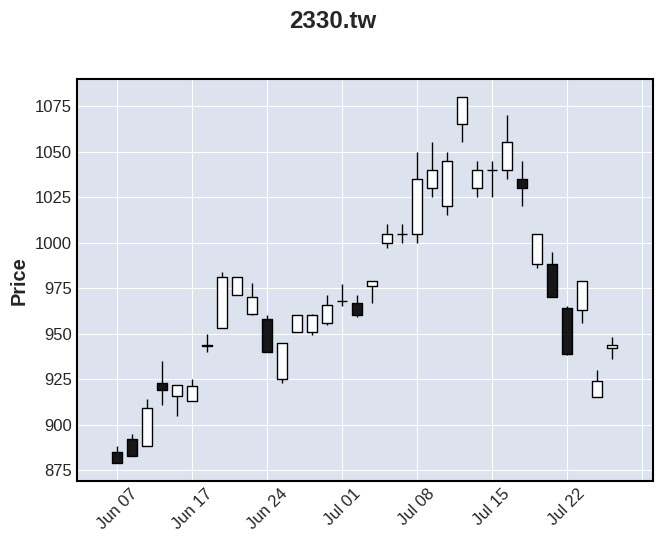

In [25]:
mpf.plot(kplot_df, type='candle', title=f'{stock_id}')

### 1Ô∏è‚É£9Ô∏è‚É£ Âä†ÂÖ•Áπ™ÂúñË®≠ÂÆö

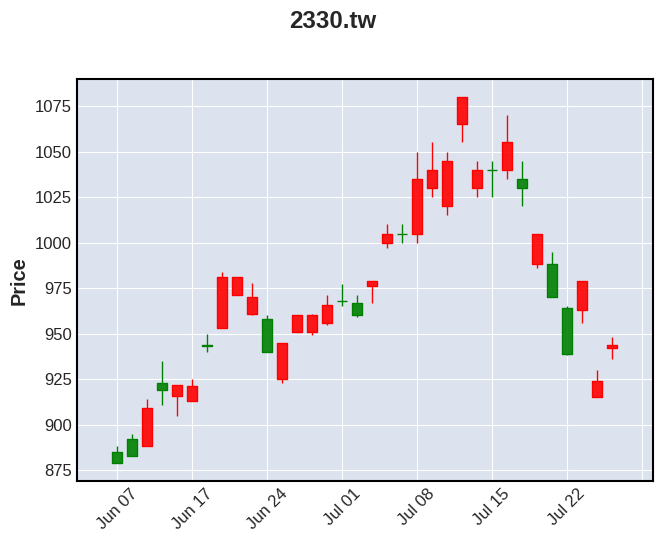

In [26]:
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)
# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle',
    style=my_style, title=f'{stock_id}')

### 2Ô∏è‚É£0Ô∏è‚É£ Âä†ÂÖ•Â≠êÂúñ

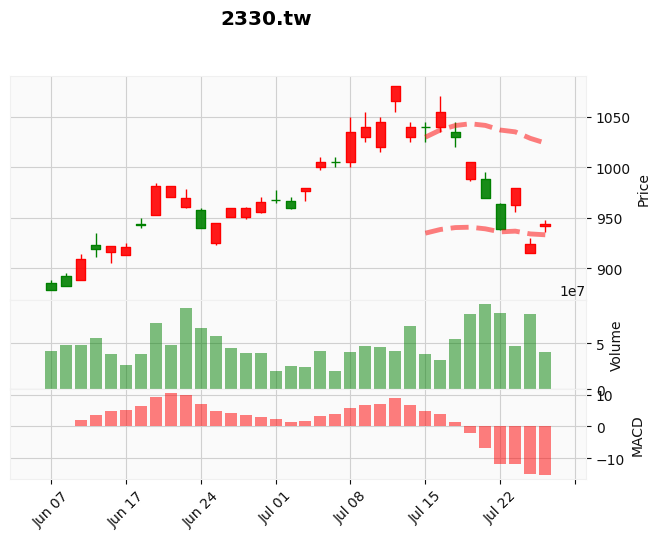

In [27]:
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',
                marketcolors=my_color)

# ‰∫§ÊòìÈáèÂíåÊäÄË°ìÊåáÊ®ôÂ≠êÂúñ
ap = [
    # ‰∏äËªåÁ∑ö
    mpf.make_addplot(kplot_df['Upper_Band'], color='red',
                      alpha=0.5, linestyle='--'),
    # ‰∏ãËªåÁ∑ö
    mpf.make_addplot(kplot_df['Lower_Band'], color='red',
                     alpha=0.5, linestyle='--'),
    # Êàê‰∫§Èáè
    mpf.make_addplot(kplot_df['Volume'], panel=1, type='bar',
                     color='g', alpha=0.5, ylabel='Volume'),
    # MACD
    mpf.make_addplot(kplot_df['MACD_Histogram'], panel=2, type='bar',
                     color='r', alpha=0.5, ylabel='MACD')
]

# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle', addplot=ap,
          style=my_style, title=f'{stock_id}')

## 4-3 plotly ‰∫íÂãïÂºèÂúñË°®

### 2Ô∏è‚É£1Ô∏è‚É£ Ê™¢Ë¶ñË≥áÊñô

In [28]:
bk_df = new_df
bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')
bk_df.tail()

index       Date    Open    High     Low   Close  Adj Close  \
Date                                                                      
2024-11-27    115 2024-11-27  1010.0  1020.0  1000.0  1000.0     1000.0   
2024-11-28    116 2024-11-28  1005.0  1005.0   992.0  1005.0     1005.0   
2024-11-29    117 2024-11-29   995.0  1010.0   994.0   996.0      996.0   
2024-12-02    118 2024-12-02  1020.0  1040.0  1015.0  1035.0     1035.0   
2024-12-03    119 2024-12-03  1060.0  1065.0  1055.0  1055.0     1055.0   

              Volume     8d_MA       13d_MA  ...  down     avg_up  avg_down  \
Date                                         ...                              
2024-11-27  31276090  1022.500  1032.307692  ...  10.0   4.863061  9.339023   
2024-11-28  33689956  1020.000  1026.153846  ...   0.0   4.881319  8.093820   
2024-11-29  40094983  1014.500  1022.000000  ...   9.0   4.230477  8.214644   
2024-12-02  31168404  1015.750  1022.000000  ...   0.0   8.866413  7.119358   
2024-12-03  43414538  1021.375  1023.538462  ...   0.0  10.350892  6.170110   

                  RSI   Upper_Band   Lower_Band       OBV     OBV_SMA  \
Date                                                                    
2024-11-27  34.241883  1043.992804  1019.358234 -31276090 -7863181.85   
2024-11-28  37.620555  1040.599835  1018.799275  33689956 -4268584.85   
2024-11-29  33.993056  1037.089336  1017.317247 -40094983 -3549321.25   
2024-12-02  55.464407  1036.951829  1018.609822  31168404 -3328299.95   
2024-12-03  62.652929  1038.492590  1021.101531  43414538 -2776854.15   

                 OBV_EMA    Month  
Date                               
2024-11-27 -1.198285e+07  2024-11  
2024-11-28 -7.633061e+06  2024-11  
2024-11-29 -1.072467e+07  2024-11  
2024-12-02 -6.734855e+06  2024-12  
2024-12-03 -1.958723e+06  2024-12  

[5 rows x 27 columns]

### 2Ô∏è‚É£2Ô∏è‚É£ ÂåØÂÖ• plotly Â•ó‰ª∂

In [30]:
import plotly.graph_objects as go

### 2Ô∏è‚É£3Ô∏è‚É£ Áπ™Ë£Ω‰∫íÂãïÂºè K Á∑öÂúñ

In [31]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# Ë™øÊï¥ÂØ¨È´ò
fig.update_layout(
    height=800,
    width=1200
)

# È°ØÁ§∫ÂúñË°®
fig.show()

### 2Ô∏è‚É£4Ô∏è‚É£ ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
Ëß£Ê±∫Áπ™Âúñ‰∏çÈÄ£Á∫åÂïèÈ°å

In [32]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# Ë™øÊï¥ÂØ¨È´ò
fig.update_layout(
    height=800,
    width=1200
)

# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
# ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
all_dates = pd.date_range(start=bk_df.index.min(),
              end=bk_df.index.max())
# ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)]
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

# È°ØÁ§∫ÂúñË°®
fig.show()

<ipython-input-32-11ede7c86549>:21: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£5Ô∏è‚É£ Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏

In [33]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])


# ÂúñË°®Êõ¥Êñ∞-Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_layout(
    height=800,
    width=1200
)


# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)] # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

<ipython-input-33-28d88b8e0393>:24: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£6Ô∏è‚É£ Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

In [34]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red', decreasing_line_color='green',
            name = "K Á∑ö")])


# Â∏ÉÊûóÈÄöÈÅì
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Upper_Band'],mode='lines',
    line={'color': 'green','dash': 'dash'},name = "‰∏äËªåÁ∑ö"))
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Lower_Band'], mode='lines',
    line={'color': 'green', 'dash': 'dash'},name = "‰∏ãËªåÁ∑ö"))

# ‰∫§ÊòìÈáè
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['Volume'], marker={'color': 'green'},
      yaxis='y2', name = "‰∫§ÊòìÈáè"))

# MACD
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['MACD_Histogram'], marker={'color': 'red'},
      yaxis='y3', name = "MACD"))

# Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="toaxis")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")

# Êõ¥Êñ∞Áï´Â∏ÉÂ§ßÂ∞è‰∏¶Â¢ûÂä†ÁØÑÂúçÈÅ∏Êìá
fig.update_layout(
    height=800,
    yaxis={'domain': [0.35, 1]},
    yaxis2={'domain': [0.15, 0.3]},
    yaxis3={'domain': [0, 0.15]},
    title=f"{stock_id}",
    xaxis={
        # ÁØÑÂúçÈÅ∏ÊìáÊ†º
        'rangeselector': {
            'buttons': [
                {'count': 1, 'label': '1M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 6, 'label': '6M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 1, 'label': '1Y',
                  'step': 'year', 'stepmode': 'backward'},
                {'step': 'all'}
            ]
        },
        # ÁØÑÂúçÊªëÂãïÊ¢ù
        'rangeslider': {
            'visible': True,
            # ÊªëÂãïÊ¢ùÁöÑÈ´òÂ∫¶ (Ë®≠ÁΩÆ 0.01 Â∞±ÊúÉËÆäÂñÆÁ¥îÁöÑ bar)
            'thickness': 0.01,
            'bgcolor': "#E4E4E4"  # ËÉåÊôØËâ≤
        },
        'type': 'date'
    }
)


# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)] # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

<ipython-input-34-c4952c4d4546>:69: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£7Ô∏è‚É£ ÂØ´ÊàêÂáΩÂºè

In [35]:
# ‰∏ãËºâË≥áÊñô‰∏¶ËÆì AI Ë®àÁÆóÊåáÊ®ô
def download_stock_data(stock_id, start=None,
                        end=None, indicator='MACD'):
    stock_id = f"{stock_id}.tw"
    if not end:
        end = dt.date.today()
    if not start:
        start = end - dt.timedelta(days=365)
    # Âæû yf ‰∏ãËºâË≥áÊñô
    df = yf.download(stock_id, start=start, end=end).reset_index()

    # AI Ë®àÁÆóÊäÄË°ìÊåáÊ®ô
    code_str = ai_helper(df, f"Ë®àÁÆó{indicator}")
    print(code_str)

    # Â∞á exec ÁîüÊàêÁöÑ calculate Ë®≠ÁÇ∫Â±ÄÈÉ®ËÆäÊï∏
    local_vars = {}
    exec(code_str, globals(), local_vars)
    calculate = local_vars['calculate']

    df = calculate(df)

    # Ë≥áÊñôËôïÁêÜ
    bk_df = df.reset_index()
    bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')

    return bk_df

# Áπ™Ë£ΩÂúñË°®ÂáΩÂºè
def create_stock_figure(stock_id, bk_df):

    # ÂâµÂª∫ K Á∑öÂúñ
    fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
                        open=bk_df['Open'],
                        high=bk_df['High'],
                        low=bk_df['Low'],
                        close=bk_df['Close'],
                        increasing_line_color='red',
                        decreasing_line_color='green',
                        name = "K Á∑ö")])

    # ‰∫§ÊòìÈáè
    fig.add_trace(go.Bar(x=bk_df.index, y=bk_df['Volume'],
                         marker={'color': 'green'}, yaxis='y2',
                           name = "‰∫§ÊòìÈáè"))

    # ÊâæÂá∫ÈúÄË¶ÅÁπ™Ë£ΩÁöÑÊ¨Ñ‰Ωç
    columns = bk_df.columns
    exclude_columns = ['index','Date', 'Open', 'High',
                        'Low', 'Close', 'Adj Close', 'Volume']
    remain_columns = [col for col in columns if
                       col not in exclude_columns]
    min_close = bk_df['Close'].min() - bk_df['Close'].std()
    max_close = bk_df['Close'].max() + bk_df['Close'].std()
    # Áπ™Ë£ΩÊäÄË°ìÊåáÊ®ô
    for i in remain_columns:
      if min_close <= bk_df[i].mean() <= max_close:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', name=i))
      else:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', yaxis='y3', name=i))

    # Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
    fig.update_xaxes(showspikes=True, spikecolor="gray",
                    spikemode="toaxis")
    fig.update_yaxes(showspikes=True, spikecolor="gray",
                    spikemode="across")
    # Êõ¥Êñ∞Áï´Â∏ÉÂ§ßÂ∞è‰∏¶Â¢ûÂä†ÁØÑÂúçÈÅ∏Êìá
    fig.update_layout(
        height=800,
        width=1200,
        yaxis={'domain': [0.35, 1]},
        yaxis2={'domain': [0.15, 0.3]},
        # Ëã•Ë¶ÅÈáçÁñä y1 Âíå y3, ÂèØ‰ª•ÊîπÊàê
        # yaxis3=dict(overlaying='y', side='right')
        yaxis3={'domain': [0, 0.15]},
        title=f"{stock_id}",
        xaxis={
            # ÁØÑÂúçÈÅ∏ÊìáÊ†º
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 1, 'label': '1Y',
                      'step': 'year', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            # ÁØÑÂúçÊªëÂãïÊ¢ù
            'rangeslider': {
                'visible': True,
                'thickness': 0.01,  # ÊªëÂãïÊ¢ùÁöÑÈ´òÂ∫¶
                'bgcolor': "#E4E4E4"  # ËÉåÊôØËâ≤
            },
            'type': 'date'
        }
    )

    # ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
    # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
    all_dates = pd.date_range(start=bk_df.index.min(),
                               end=bk_df.index.max())
    # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
    breaks = all_dates[~all_dates.isin(bk_df.index)]
    dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®Ê†ºÂºè
    fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

    return fig

# ‰∏ªÂáΩÂºè
def plotly_stock(stock_id, start=None, end=None, indicator='MACD'):

    df = download_stock_data(stock_id, start, end, indicator)
    fig = create_stock_figure(stock_id,df)
    fig.show()

### 2Ô∏è‚É£8Ô∏è‚É£ Âü∑Ë°åÂáΩÂºè

In [36]:
plotly_stock("2317", start='2022-01-01', end= None,
             indicator='Â∏ÉÊûóÈÄöÈÅìÂèäMACD')

[*********************100%%**********************]  1 of 1 completed


def calculate(df):
    # Calculate Bollinger Bands
    df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['std_dev'] = df['Close'].rolling(window=20).std()
    df['upper_band'] = df['EMA'] + (2 * df['std_dev'])
    df['lower_band'] = df['EMA'] - (2 * df['std_dev'])

    # Calculate MACD
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['signal_line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df


<ipython-input-35-a35f8eaabc95>:107: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

